In [1]:
# Libraries
import pandas as pd

# Calling functions
from src.utils import hierarchical_model as HRM

I will use the  Min-Max Data Scaled 

In [2]:
# Load the data selected
dataset = pd.read_csv('../data/processed/data_scaled_minmax.csv')

# Dindrogram

## Optimal Linkage Matrix Method
Choose the optimal method for calculating the linkage matrix and displaying it as a dindrogram graph.

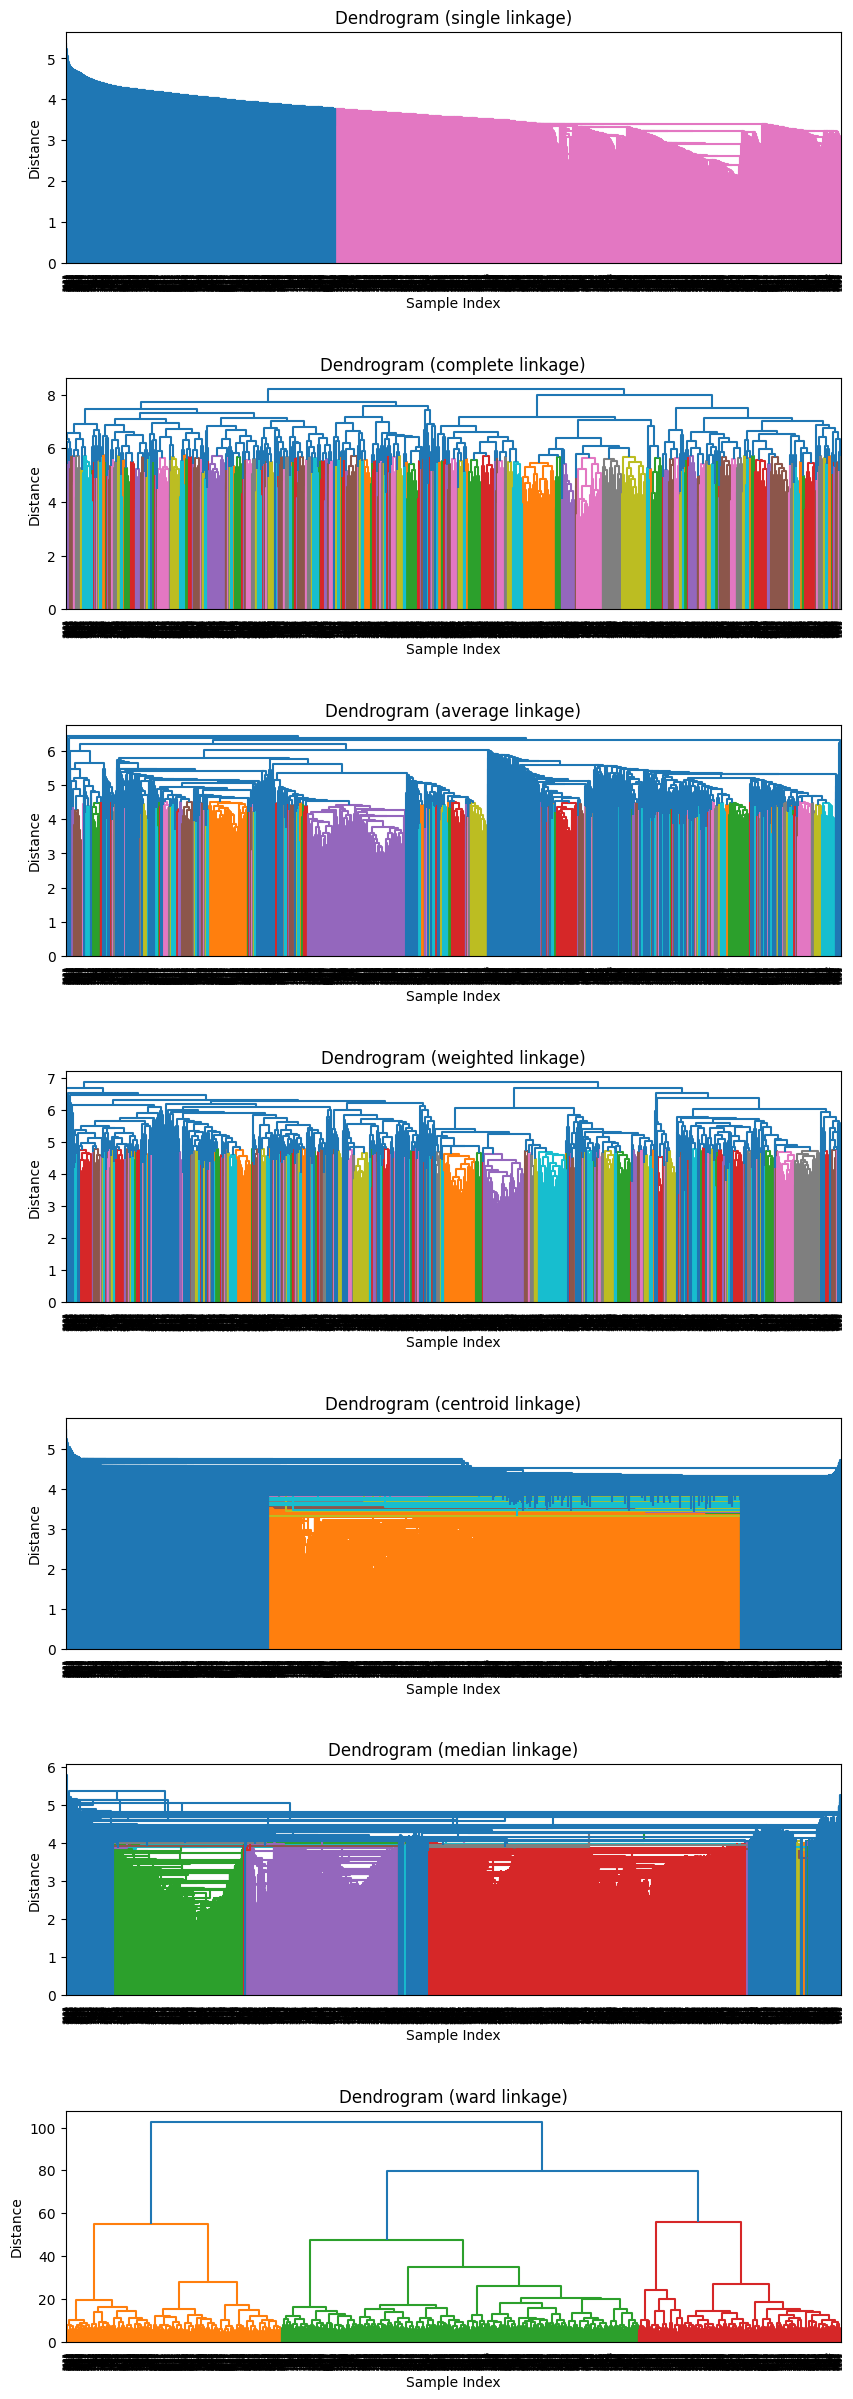

In [4]:
# Display the dendrogram graph for all linkage matrices for each metric.
HRM.plot_dendrogram_all_methods(dataset)

The *ward method* is the most appropriate dendrograms, **I will chose it since it is more readable.**

In [3]:
# Calculate the linkage matrix by the ward metric
ward_linkage = HRM.get_linkage(dataset, 'ward')

## Number of Clusters

Finding an interesting number of clusters in a dendrogram is the same as **finding the largest horizontal space that doesn't have any vertical lines** (the space with the longest vertical lines). 
***This means that there's more separation between the clusters.***

According to the previous dendrogram graph, the ideal **number of clusters** is obtained by cutting the graph **at distance 60**.

**The number of clusters can be three or four**, depending on where we will cut the longest distance.

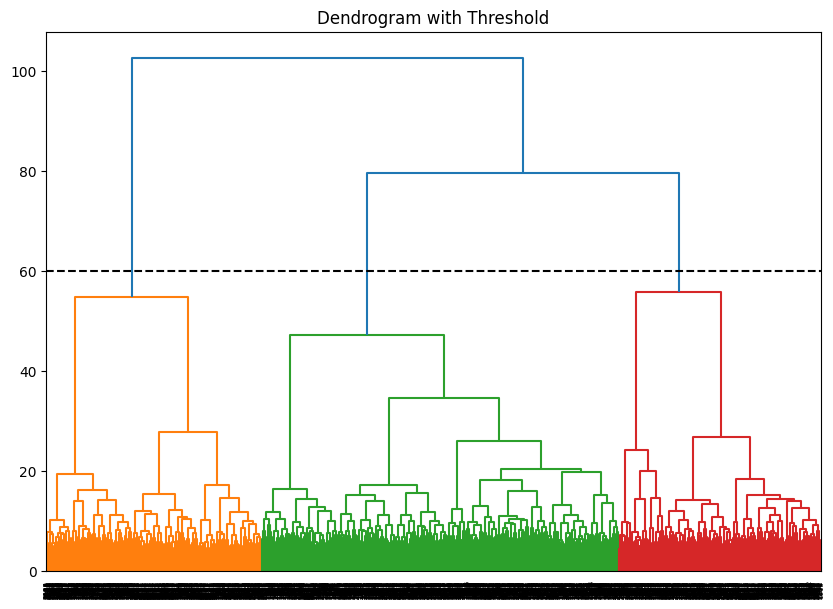

In [4]:
# Display the dendrogram with the threshould cutting at 60 
HRM.plot_thresholded_dendrogram(ward_linkage, 60)

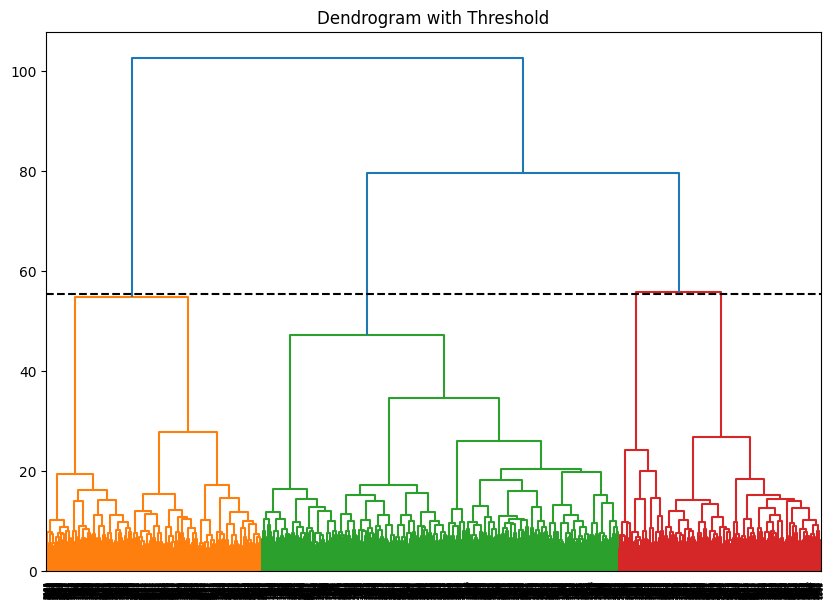

In [5]:
# Display the dendrogram with the threshould cutting at 55.5
HRM.plot_thresholded_dendrogram(ward_linkage, 55.5)

# Hierarchical Clustering

## Clustering before PCA

Store the resulting cluster labels after Perform hierarchical clustering on a dataset

In [4]:
# using 3 clusters
before_3k_labels = HRM.hierarchical_clustering(data=dataset, k=3)

# using 4 clusters
before_4k_labels = HRM.hierarchical_clustering(data=dataset, k=4)

### Plotting in 2-Dimension

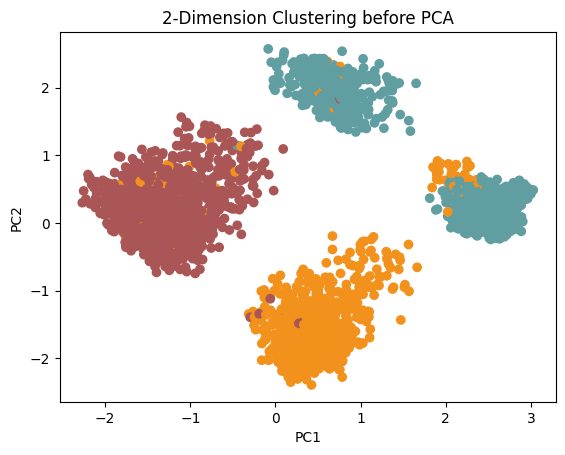

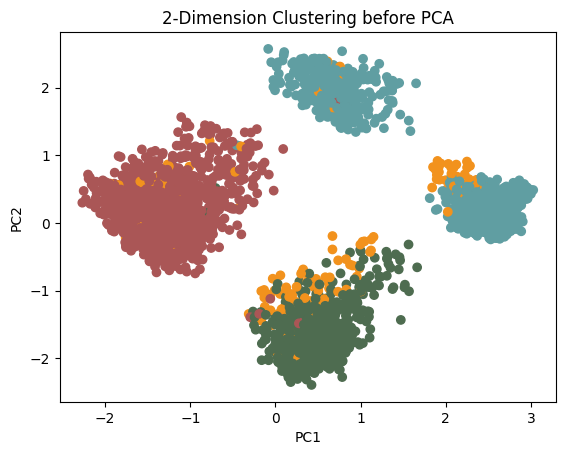

In [5]:
# Create a 2-dimension scatter plot of the data with 3 cluster labels
HRM.plot_clustering_before_reduction(data=dataset, labels=before_3k_labels, dimensions=2)

# Create a 2-dimension scatter plot of the data with 4 cluster labels
HRM.plot_clustering_before_reduction(data=dataset, labels=before_4k_labels, dimensions=2)

### Plotting in 3-Dimension

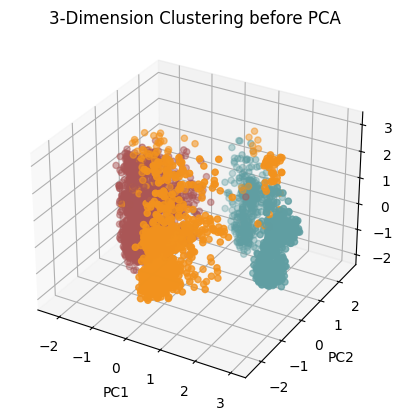

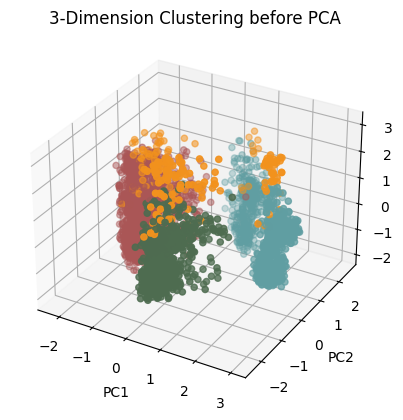

In [6]:
# Create a 3-dimension scatter plot of the data with 3 cluster labels
HRM.plot_clustering_before_reduction(data=dataset, labels=before_3k_labels, dimensions=3)

# Create a 3-dimension scatter plot of the data with 4 cluster labels
HRM.plot_clustering_before_reduction(data=dataset, labels=before_4k_labels, dimensions=3)

## Clustering after PCA

In [7]:
# Perform PCA on the dataset to reduce the dimensions to 2
transformed_2D = HRM.get_transform_PCA(data=dataset, dimensions=2)

Store the resulting cluster labels after Perform hierarchical clustering on the transformed dataset

In [8]:
# using 3 clusters
transformed_3k_labels = HRM.hierarchical_clustering(data=transformed_2D, k=3)

# using 4 clusters
transformed_4k_labels = HRM.hierarchical_clustering(data=transformed_2D, k=4)

### Plotting in 2-Dimension

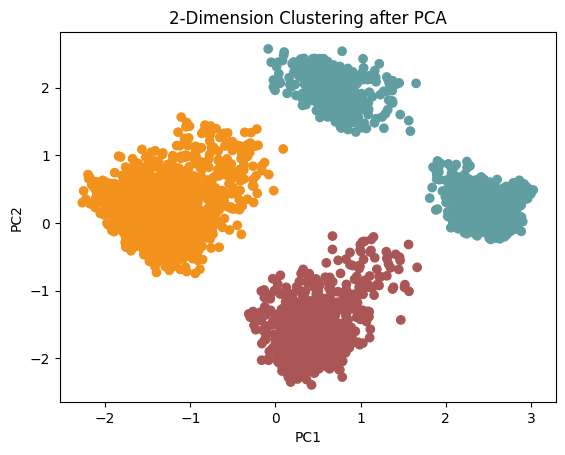

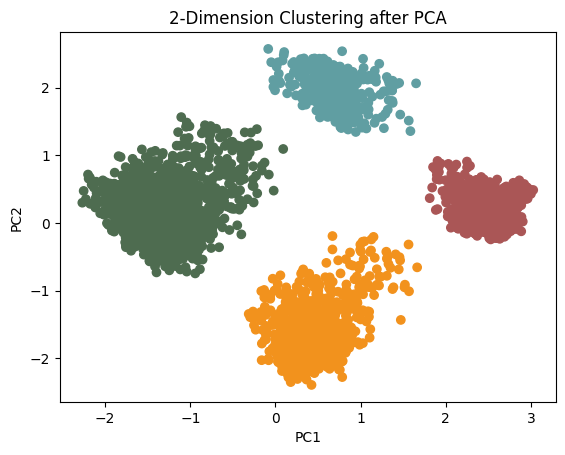

In [9]:
# Create a 2-dimension scatter plot of the transformed data with 3 cluster labels
HRM.plot_clustering_after_reduction(labels=transformed_3k_labels, transformed=transformed_2D, dimensions=2)

# Create a 2-dimension scatter plot of the transformed data with 4 cluster labels
HRM.plot_clustering_after_reduction(labels=transformed_4k_labels, transformed=transformed_2D, dimensions=2)

### Plotting in 3-Dimension

In [10]:
# Perform PCA on the dataset to reduce the dimensions to 3
transformed_3D =  HRM.get_transform_PCA(data=dataset, dimensions=3)

Store the resulting cluster labels after Perform hierarchical clustering on the transformed dataset

In [11]:
# with 3 clusters
transformed_3k_labels = HRM.hierarchical_clustering(transformed_3D, 3)

# with 4 clusters
transformed_4k_labels = HRM.hierarchical_clustering(transformed_3D, 4)

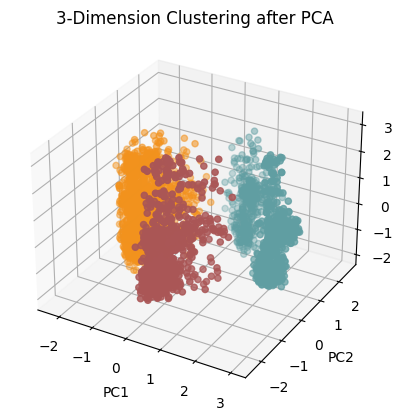

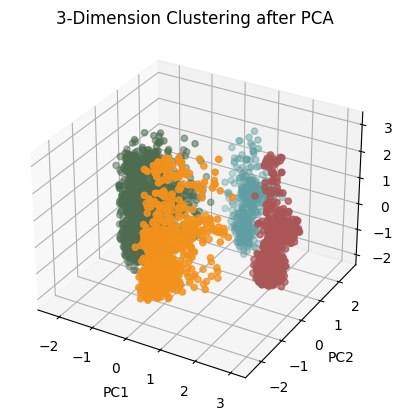

In [12]:
# Create a 3-dimension scatter plot of the transformed data with 3 cluster labels
HRM.plot_clustering_after_reduction(transformed_3k_labels, transformed_3D, 3)

# Create a 3-dimension scatter plot of the transformed data with 4 cluster labels
HRM.plot_clustering_after_reduction(transformed_4k_labels, transformed_3D, 3)

I suggest the hierarchical model with **four clusters after applying PCA** based on the four results.

# Save the result

In [15]:
dataset['cluster'] = transformed_4k_labels

In [17]:
# Share data with clusters 
dataset.to_csv("../data/models/hierarchical.csv", index=False)